In [1]:
# import numpy as np
# import pandas as pd
# import imageio
# import glob
# from zipfile import ZipFile 

# #my childhood soccer number
# np.random.seed(33)


# df = pd.read_csv('data/styles.csv', error_bad_lines=False)


# all_img = []
# for i, ix in enumerate( df.id ):
#     if i%2000==0:
#         print(i, len(df))

#     fn = r'data/data/images/{}.jpg'.format(ix)
#     try:
#         img = imageio.imread(fn)
#         if img.shape!=(80, 60, 3):
#             all_img.append( [0]*(60*80*3) )
#         else:
#             all_img.append( img.ravel() )
#     except FileNotFoundError:
#         all_img.append( [0]*(60*80*3) )

# all_img = np.stack(all_img)
# bw_float64 = all_img.reshape(-1, 80, 60, 3).mean(3).reshape(-1, 80*60)
# bw_img = bw_float64.astype('float16')
# np.savez_compressed('data/original_image_arr', a=all_img, b=bw_img)

0 44446
2000 44446
4000 44446
6000 44446
8000 44446
10000 44446
12000 44446
14000 44446
16000 44446
18000 44446
20000 44446
22000 44446
24000 44446
26000 44446
28000 44446
30000 44446
32000 44446
34000 44446
36000 44446
38000 44446
40000 44446
42000 44446
44000 44446


In [1]:
#standard imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import imageio

In [2]:
df = pd.read_csv('data/full_labels_df.csv')
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
3,30805,Men,Apparel,Topwear,Shirts,Green,Summer,2012.0,Ethnic,Fabindia Men Striped Green Shirt
4,26960,Women,Apparel,Topwear,Shirts,Purple,Summer,2012.0,Casual,Jealous 21 Women Purple Shirt


In [3]:
loaded = np.load('data/full_image_arr.npz')
bw_img = loaded['b']

In [4]:
# labels = df.masterCategory.copy()
# labels = labels.astype('category')
# labels = labels.cat.codes

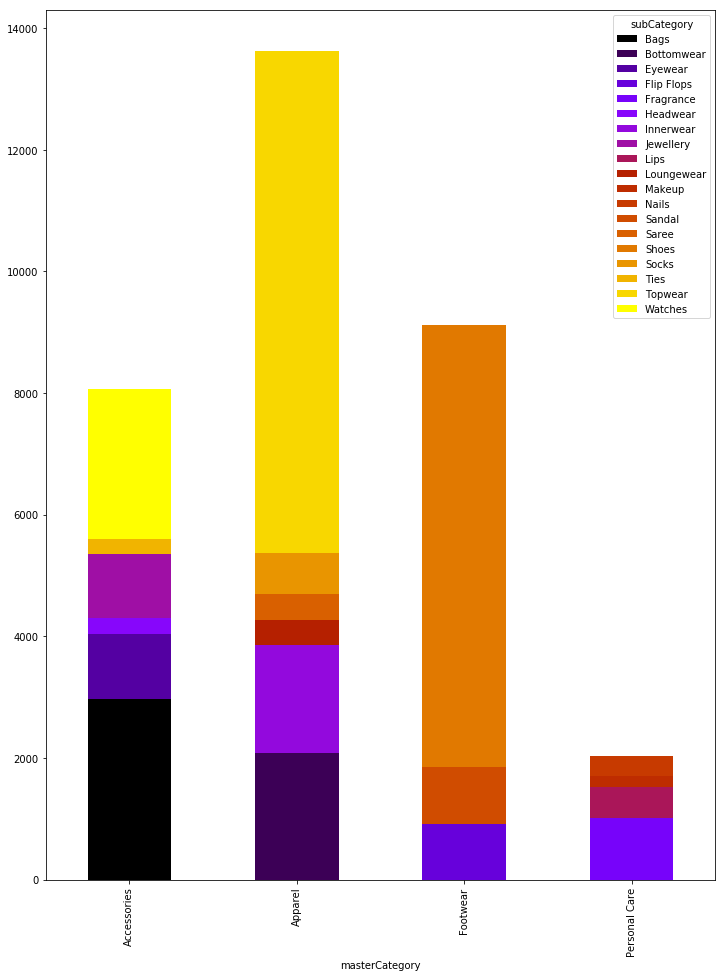

In [28]:
df.subCategory = df.subCategory.str.replace('Loungewear and Nightwear', 'Loungewear')
df2 = df[['masterCategory','subCategory', 'id']].groupby(['masterCategory','subCategory']).count().unstack('subCategory').fillna(0)
df3 = df2['id']
df4 = df3.transpose()
df3.plot(kind='bar', stacked=True,figsize=(12,16), cmap='gnuplot')
#plt.legend(loc='best')

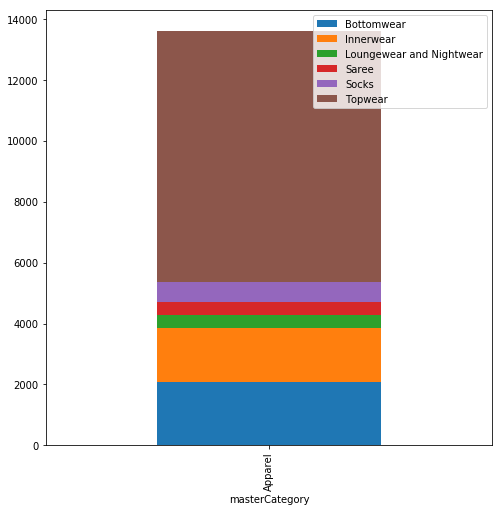

In [8]:
df2 = df[df.masterCategory=='Apparel'][['masterCategory','subCategory', 'id']].groupby(['masterCategory','subCategory']).count().unstack('subCategory').fillna(0)
df3 = df2['id']
df4 = df3.transpose()
df3.plot(kind='bar', stacked=True,figsize=(8,8))
plt.legend(loc='best')

In [103]:
masterCat_codes = {}
for i in range(len(labels.value_counts().index)):
    s = labels.value_counts().index[i]
    t = df.masterCategory.value_counts().index[i]
    masterCat_codes[s] = t
masterCat_codes

NameError: name 'labels' is not defined

In [6]:
masterCat_counts = {}
for i in range(len(labels.value_counts().index)):
    s = labels.value_counts().values[i]
    t = df.masterCategory.value_counts().index[i]
    masterCat_counts[t] = s
masterCat_counts

{'Apparel': 21341,
 'Accessories': 11004,
 'Footwear': 9119,
 'Personal Care': 2393}

In [30]:
subCat_counts = {}
for i in range(len(df.subCategory.value_counts().index)):
    s = df.subCategory.value_counts().values[i]
    t = df.subCategory.value_counts().index[i]
    subCat_counts[t] = s


In [9]:
cat_names = pd.Series(list(df.masterCategory.value_counts().index))
cat_counts = df.masterCategory.value_counts().values
df.masterCategory.value_counts().sum()
cat_percent = np.round(df.masterCategory.value_counts().values/43857, 2)
summary_df = pd.DataFrame(cat_names, index=range(4), columns=['Main Category'])
summary_df['Item Count'] = cat_counts
summary_df['Percent of Full Dataset'] = cat_percent
summary_df

,Main Category,Item Count,Percent of Full Dataset
0,Apparel,21341,0.49
1,Accessories,11004,0.25
2,Footwear,9119,0.21
3,Personal Care,2393,0.05


In [39]:
list(df.subCategory.value_counts().index)

Index(['Topwear', 'Shoes', 'Bags', 'Bottomwear', 'Watches', 'Innerwear',
       'Eyewear', 'Jewellery', 'Fragrance', 'Sandal', 'Flip Flops', 'Wallets',
       'Belts', 'Socks', 'Lips', 'Dress', 'Loungewear and Nightwear', 'Saree',
       'Nails', 'Makeup', 'Headwear', 'Ties', 'Accessories', 'Scarves',
       'Apparel Set', 'Cufflinks', 'Stoles', 'Skin Care', 'Skin', 'Eyes',
       'Mufflers', 'Shoe Accessories', 'Hair', 'Gloves', 'Bath and Body',
       'Water Bottle', 'Perfumes', 'Umbrellas', 'Beauty Accessories',
       'Sports Accessories'],
      dtype='object')

In [32]:
def multi_index_counts(col, col2):
    counts = df.groupby([col, col2]).count().id
    return counts

In [79]:
df = pd.read_csv('data/full_labels_df.csv')

In [110]:
x = round(df[df.masterCategory=='Apparel'].groupby(['subCategory','articleType']).count().id / df[df.masterCategory=='Apparel'].groupby(['subCategory']).count().id, 3 )

In [135]:
def part1(mast_cat):
    items = df[df.masterCategory==mast_cat].groupby(['subCategory','articleType']).count().id 
    return items

def filter(mast_cat, line):
    items = df[df.masterCategory==mast_cat].groupby(['subCategory','articleType']).count().id
    num_drop = len(items[items < line])
    drop_list = []
    for i in range(num_drop):
        c = items[items < line].index[i][1]
        drop_list.append(c)
    return drop_list

In [143]:
perfumes= list(df[df.subCategory=='Perfumes'].index)
df.iloc[perfumes, 2] = 'Personal Care'
df.iloc[perfumes, 3] = 'Fragrance'

eyes = list(df[df.subCategory=='Eyes'].index)
df.iloc[eyes,3] = 'Makeup'

In [149]:
part1('Footwear')

subCategory  articleType   
Flip Flops   Flip Flops         910
Sandal       Flip Flops           1
             Sandals            875
             Sports Sandals      67
Shoes        Casual Shoes      2816
             Flats              495
             Formal Shoes       619
             Heels             1316
             Sandals              2
             Sports Shoes      2018
Name: id, dtype: int64

In [148]:
app_drop_list = filter_article('Apparel', 30)
acc_drop_list = filter_article('Accessories', 30)
pc_drop_list = filter_article('Personal Care', 30)

['Lip Care', 'Lip Plumper', 'Concealer', 'Makeup Remover', 'Mascara']

In [150]:
app_drop_list + acc_drop_list + pc_drop_list

['Rain Trousers',
 'Salwar and Dupatta',
 'Swimwear',
 'Tights',
 'Tracksuits',
 'Jumpsuit',
 'Shapewear',
 'Baby Dolls',
 'Bath Robe',
 'Lounge Tshirts',
 'Robe',
 'Shorts',
 'Booties',
 'Belts',
 'Blazers',
 'Dresses',
 'Lehenga Choli',
 'Nehru Jackets',
 'Rain Jacket',
 'Rompers',
 'Shrug',
 'Waistcoat',
 'Rucksacks',
 'Tablet Sleeve',
 'Travel Accessory',
 'Trolley Bag',
 'Waist Pouch',
 'Wallets',
 'Tshirts',
 'Hat',
 'Headband',
 'Lip Care',
 'Lip Plumper',
 'Concealer',
 'Makeup Remover',
 'Mascara']

In [153]:
drop_list = app_drop_list + acc_drop_list + pc_drop_list
drop_idx = list(df[df.articleType.isin(drop_list)].index)
df = df[~df.articleType.isin(drop_idx)]

In [154]:
multi_index_counts('masterCategory', 'subCategory')

masterCategory  subCategory             
Accessories     Bags                         3002
                Belts                         788
                Eyewear                      1067
                Headwear                      286
                Jewellery                    1043
                Ties                          251
                Wallets                       894
                Watches                      2461
Apparel         Bottomwear                   2685
                Dress                         478
                Innerwear                    1773
                Loungewear and Nightwear      470
                Saree                         424
                Socks                         676
                Topwear                     15393
Footwear        Flip Flops                    910
                Sandal                        943
                Shoes                        7266
Personal Care   Fragrance                    1016
         

In [66]:
counts = df.subCategory.value_counts()
print(counts.index)
counts


short_list = ['Accessories', 'Apparel Set', 'Cufflinks', 'Stoles', 'Skin Care', 'Skin','Mufflers', 'Shoe Accessories', 'Hair', 'Gloves', 'Bath and Body','Water Bottle', 'Umbrellas', 'Beauty Accessories', 'Sports Accessories']

Index(['Topwear', 'Shoes', 'Bottomwear', 'Innerwear', 'Fragrance', 'Sandal',
       'Flip Flops', 'Socks', 'Lips', 'Dress', 'Loungewear and Nightwear',
       'Saree', 'Nails', 'Makeup', 'Apparel Set', 'Skin Care', 'Skin', 'Eyes',
       'Hair', 'Bath and Body', 'Perfumes', 'Beauty Accessories'],
      dtype='object')


In [55]:
counts = df.articleType.value_counts()
#print(list(counts.index)[40:])
counts[counts < 50]


# short_list = ['Accessories', 'Apparel Set', 'Cufflinks', 'Stoles', 'Skin Care', 'Skin','Mufflers', 'Shoe Accessories', 'Hair', 'Gloves', 'Bath and Body','Water Bottle', 'Umbrellas', 'Beauty Accessories', 'Sports Accessories']

Compact                      49
Lip Liner                    48
Eyeshadow                    42
Suspenders                   40
Camisoles                    39
Patiala                      38
Jeggings                     34
Lounge Shorts                34
Stockings                    32
Salwar                       32
Churidar                     30
Tracksuits                   29
Face Wash and Cleanser       28
Sunscreen                    25
Bath Robe                    20
Hair Colour                  19
Rain Jacket                  18
Swimwear                     17
Baby Dolls                   16
Jumpsuit                     16
Lip Care                     15
Waistcoat                    15
Mask and Peel                12
Booties                      12
Mascara                      12
Rompers                      12
Concealer                    11
Shapewear                     9
Tights                        9
Blazers                       8
Clothing Set                  8
Salwar a

In [75]:
item_list = ['Sunscreen',
 'Bath Robe',
 'Hair Colour',
 'Rain Jacket',
 'Swimwear',
 'Baby Dolls',
 'Jumpsuit',
 'Lip Care',
 'Waistcoat',
 'Mask and Peel',
 'Booties',
 'Mascara',
 'Rompers',
 'Concealer',
 'Shapewear',
 'Tights',
 'Blazers',
 'Clothing Set',
 'Salwar and Dupatta',
 'Shrug',
 'Nail Essentials',
 'Eye Cream',
 'Body Lotion',
 'Face Scrub and Exfoliator',
 'Nehru Jackets',
 'Toner',
 'Lip Plumper',
 'Robe',
 'Lehenga Choli',
 'Makeup Remover',
 'Beauty Accessory',
 'Belts',
 'Lounge Tshirts',
 'Face Serum and Gel',
 'Rain Trousers',
 'Mens Grooming Kit',
 'Body Wash and Scrub']
item_list

['Sunscreen',
 'Bath Robe',
 'Hair Colour',
 'Rain Jacket',
 'Swimwear',
 'Baby Dolls',
 'Jumpsuit',
 'Lip Care',
 'Waistcoat',
 'Mask and Peel',
 'Booties',
 'Mascara',
 'Rompers',
 'Concealer',
 'Shapewear',
 'Tights',
 'Blazers',
 'Clothing Set',
 'Salwar and Dupatta',
 'Shrug',
 'Nail Essentials',
 'Eye Cream',
 'Body Lotion',
 'Face Scrub and Exfoliator',
 'Nehru Jackets',
 'Toner',
 'Lip Plumper',
 'Robe',
 'Lehenga Choli',
 'Makeup Remover',
 'Beauty Accessory',
 'Belts',
 'Lounge Tshirts',
 'Face Serum and Gel',
 'Rain Trousers',
 'Mens Grooming Kit',
 'Body Wash and Scrub']

In [74]:
item_list = list(counts.index)[60:]
item_list

[]

In [145]:
short_list = ['Accessories', 'Scarves', 'Apparel Set', 'Cufflinks', 'Stoles', 'Skin Care', 
              'Skin','Mufflers', 'Shoe Accessories', 'Hair', 'Gloves', 'Bath and Body',
              'Water Bottle', 'Umbrellas', 'Beauty Accessories', 'Sports Accessories']
short_idx = list(df[df.subCategory.isin(short_list)].index)
print(len(short_idx))
df = df[~df.subCategory.isin(short_list)]
print(len(df))

833
43024


In [76]:
item_idx = list(df[df.articleType.isin(item_list)].index)

df = df[~df.articleType.isin(item_list)]

In [77]:
len(df)

42009